In [104]:
#Dividiendo los datos, Sin estandarizar los datos de X,Y  el score -0.17 = -17%
#Dividiendo los datos y estandarizando X,Y = 194k. Score 95%
#Dividiendo los datos y estandarizando X, no Y. el soce es -0.13 = -13%
#Sin dividir, estandarizando X,Y = socreo= 0.75 = 75% ---->ok
#Sin dividir, estandarizando X. 130k. socreo= -0.17 = - 17% 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
#Este ejercicion se resolvio con arboles y bosques
dataset = pd.read_csv("C:/Users/Vic/Documents/CursoMachineLearning/Dataset/Position_Salaries/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [106]:
x = dataset.iloc[:,1:2].values #Level
y = dataset.iloc[:,2:3].values #Salary

In [55]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [107]:
#ESCALADO
#Normalmente se escala X. pero en regresion es necesario escalar Y.
#En regresion se necesita predecir.
#Escalar X,Y
#En regresion hay que aproximarse al resultado lo mas que se pueda. 

from sklearn.preprocessing import StandardScaler

In [108]:
#RARAVEZ se escala Y
sc_x = StandardScaler()
sc_y = StandardScaler()

x=sc_x.fit_transform(x)
#y=sc_y.fit_transform(y)

#x_train = sc_x.fit_transform(x_train)
#x_test = sc_x.transform(x_test)

#y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.transform(y_test)

C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [109]:
pd.DataFrame(x).head()
#x_train

,0
0,-1.566699
1,-1.218544
2,-0.870388
3,-0.522233
4,-0.174078


In [110]:
pd.DataFrame(y).head()
#y_train

,0
0,45000
1,50000
2,60000
3,80000
4,110000


In [111]:
from sklearn.svm import SVR

In [112]:
#kernel=rbf. algoritmo gaussiano.
regresion = SVR(kernel="rbf")
#regresion.fit(x_train,y_train)
regresion.fit(x,y)

C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [114]:
y_pred=regresion.predict(x)
pd.DataFrame(y_pred)

,0
0,129997.082810
1,129996.484492
2,129996.540096
3,129997.433132
4,129999.048301
5,130000.951699
6,130002.566868
7,130003.459904
8,130003.515508
9,130002.917190


In [115]:
pd.DataFrame(y)

,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [97]:
#La matriz de confucion no soporta valores continuos
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(x,y)
#cm

In [116]:
regresion.score(x,y) #0.95 = 95%

-0.17702383872495364

In [117]:
#Prediccion.
#Los datos estan estandarizados, usar transform.
y_pred = regresion.predict(sc_x.transform([[6.5]]))
y_pred

array([130001.82883924])

In [119]:
#Obtener la invesa de un valor escalado.
#y_pred_inversa = sc_y.inverse_transform(y_pred)
#y_pred_inversa


#El empleado quiere ganar 160k
#Arbol = 150k
#Bosque = 167 k
#SVR =170k

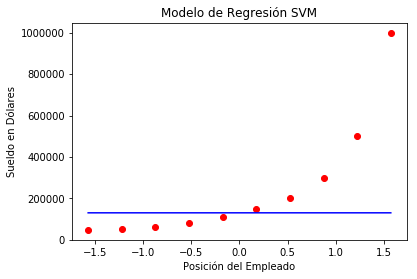

In [120]:
plt.scatter(x,y,c="red")
plt.plot(x,regresion.predict(x),color="blue")
plt.title("Modelo de Regresión SVM")
plt.xlabel("Posición del Empleado")
plt.ylabel("Sueldo en Dólares")
plt.show()



#Arboles o SVM-Regresion?
#R.
#Los bosques aleatorios, es adecuado para trabajar con multiclase
#SVM es adecuado para trabajar con dos clases.
#Cross validation permite seleccionar un modelo.